In [117]:
# planteamiento de hipotesis:
''' Cuales son las areas donde mas ataques hay?
    Cual es el grupo de personas mas afectadas? (surferos, bañistas, edad etc..) La mayoria de ataques fueron letales?
    Relacion entre area y especie de tiburon
    En que años se pordujeron mas ataques?'''
# encapsular en funciones los procesos - funcion clean(funcion para limpiar el data frame)

' Cuales son las areas donde mas ataques hay?\n    Cual es el grupo de personas mas afectadas? (surferos, bañistas, edad etc..) La mayoria de ataques fueron letales?\n    Relacion entre area y persona afectada \n    Hay alguna correlacion con las horas en los ataques?\n    En que años se pordujeron mas ataques?'

In [118]:
# importamos librerias
import numpy as np
import pandas as pd 
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# importamos data set
sharks_raw = pd.read_csv("dataset/attacks.csv", encoding='ISO-8859–1')

In [120]:
# primera vision del data set
sharks_raw.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [121]:
sharks_raw.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
sharks_raw.shape

(25723, 24)

In [123]:
sharks_raw.info() 
# en el data set hay sobre todo floats y objects(la mayoria son strings, fechas o URL). El data set tiene 24 columnas y 25,7k filas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [124]:
# Guardamos las columnas para mas adelante
columnas = list(sharks_raw.columns)
type(columnas)
columnas

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order',
 'Unnamed: 22',
 'Unnamed: 23']

In [125]:
# Eliminamos los espacios en blanco al final de los nombres de las columnas
sharks_raw.columns = sharks_raw.columns.str.strip()

In [126]:
# Eliminamos las dos ultimas columnas porque solo tienen valores nulos y no nos interesan
sharks_raw.drop(columns=["Unnamed: 22","Unnamed: 23"], inplace = True)

In [127]:
# Eliminamos las columnas de case number.1 y 2 porque estan repetidas y tienen la misma data que case number
sharks_raw.drop(columns=["Case Number.1","Case Number.2"], inplace = True)

In [128]:
# Eliminamos la columna pdf porque es la misma data que name y date(no es relevante esta columna)
sharks_raw.drop(columns=["pdf"], inplace = True)

In [129]:
# Eliminamos la columna href y href formula porque los enlaces dan error y por tanto, no relevante
sharks_raw.drop(columns = ["href","href formula"], inplace = True)

In [130]:
# Eliminamos la columna Year porque ya tenemos una columna con la fecha
sharks_raw.drop(columns = ["Year"], inplace = True)

In [131]:
sharks_raw.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0


In [132]:
# Empezamos comprobando los nulos
sharks_raw.isnull().sum()

Case Number               17021
Date                      19421
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
original order            19414
dtype: int64

In [133]:
# Actualizamos la lista de columnas
columnas_clean = list(sharks_raw.columns)

In [134]:
# Miramos como estan distribuidos los NAN
sharks_raw[sharks_raw[columnas_clean] == ""]
# No podemos hacer dropna porque eliminariamos filas con datos que si queremos

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# A partir de la fila 6302 los valores son Nulos podemos eliminar esas filas
sharks_raw["Date"].isna().idxmax()


6302

In [136]:
# Eliminas las filas que comentabamos anteriormente
sharks_raw.drop(sharks_raw.index[6302:], inplace=True)

In [137]:
# Tenemos que reemplazar los NAN, lo haremos por unknown porque si hacemos dropna eliminaremos filas que tambien tienen datos
sharks_raw.fillna("unknown",inplace= True)

In [138]:
sharks_raw.head()

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,6299.0


In [139]:
# reseteamos el index para tenerlo de nuevo bien ordenado
sharks_raw.reset_index(drop=True,inplace=True)

In [140]:
# Volvemos a mirar si hay NAN
sharks_raw.isnull().sum()

Case Number               0
Date                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Sex                       0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
original order            0
dtype: int64

In [141]:
# Ahora revisamos si hay duplicados
sharks_raw.duplicated().sum()


np.int64(0)

In [142]:
# Modificamos la columna date con las fechas de case number
sharks_raw["Date"] = sharks_raw["Case Number"]

In [143]:
# Eliminamos la columna case number y crearemos una nueva con el indice unico
sharks_raw.drop(columns= "Case Number", inplace = True)
sharks_raw.reset_index(inplace=True)

In [144]:
# Llamamos a la columna index "Case Number de nuevo"

sharks_raw.rename(columns={"index":"Case Number"}, inplace= True)
sharks_raw.head(10)

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",6302.0
2,2,2018.06.09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",6301.0
3,3,2018.06.08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",6300.0
4,4,2018.06.04,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,6299.0
5,5,2018.06.03.b,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,unknown,"No injury, board bitten",N,unknown,unknown,"Daily Telegraph, 6/4/2018",6298.0
6,6,2018.06.03.a,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6297.0
7,7,2018.05.27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",6296.0
8,8,2018.05.26.b,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",6295.0
9,9,2018.05.26.a,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,unknown,"K. McMurray, Tracking Sharks.com",6294.0


In [145]:
# Eliminamos las letras que hay detras de algunas fechas utilizando regex
sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1984144972.py:2: SyntaxWarning: invalid escape sequence '\D'
  sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1984144972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_raw["Date"].replace({"\D\D\Z" :""}, regex= True,inplace= True)


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2870886894.py:4: SyntaxWarning: invalid escape sequence '\A'
  sharks_raw["weird_value"] = sharks_raw["Date"].apply(lambda row: re.search("\A\d{4}\.\d{2}\.\d{2}", row) is not None)
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2870886894.py:8: SyntaxWarning: invalid escape sequence '\A'
  sharks_all_dates["year_raw"] = sharks_all_dates["Date"].apply(lambda row: int(re.search("\A\d{4}", row)[0]))
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2870886894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

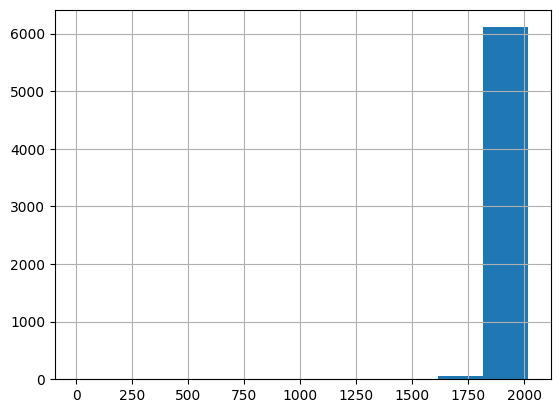

In [146]:
# Encontramos las filas que tienen fechas con valores extraños y lo visualizamos para ver cuanto representa de la muestra
# Bernardo me ayudo en esta parte, pero el proceso es aplicar a la columna date, el metodo search de regex para cada fila mediante lambda, y asi obtener los valores que cumplen el patron. 

sharks_raw["weird_value"] = sharks_raw["Date"].apply(lambda row: re.search("\A\d{4}\.\d{2}\.\d{2}", row) is not None)

sharks_all_dates = sharks_raw[sharks_raw["weird_value"] == True]

sharks_all_dates["year_raw"] = sharks_all_dates["Date"].apply(lambda row: int(re.search("\A\d{4}", row)[0]))

sharks_all_dates["year_raw"].hist()

plt.show()

In [147]:
# Vemos que la mayoria de los datos van del 1750 a la actualizad, por tanto, nos quedaremos solo con esos datos
sharks_clean_dates = sharks_all_dates[sharks_all_dates["year_raw"] >= 1750]

<Axes: >

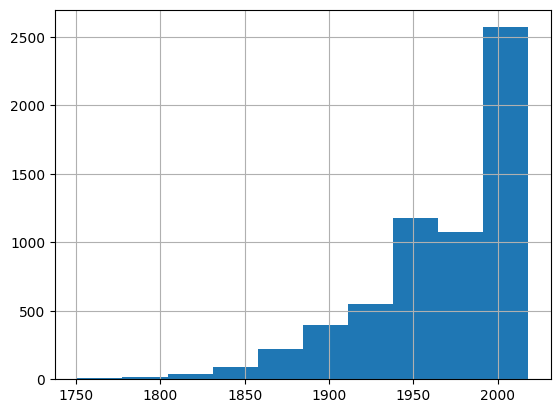

In [148]:
# Vemos que la muestra mas representativa se encuentra entre el 1900 y el 2000, de manera que me quedare la data en ese rango
sharks_clean_dates["year_raw"].hist()

<Axes: >

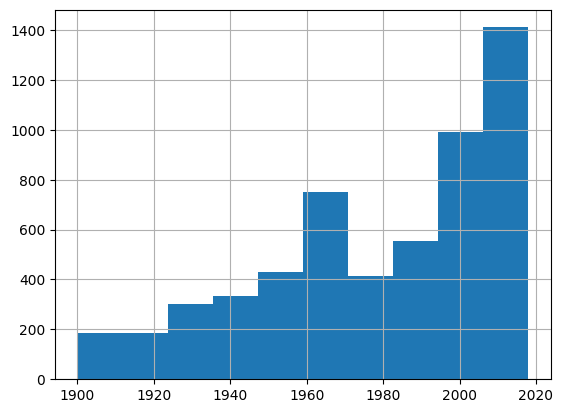

In [149]:
sharks_clean_dates = sharks_all_dates[sharks_all_dates["year_raw"] >= 1900]
sharks_clean_dates["year_raw"].hist()

In [150]:
# Eliminamos las columnas que hemos creado para comprobar que ya no nos interesan
sharks_clean_dates.drop(columns={"weird_value","year_raw"}, inplace = True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1130572377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates.drop(columns={"weird_value","year_raw"}, inplace = True)


In [151]:
# Creamos un diccionario con los nuevos valores de Country y actualizamos
new_Country ={525: "ENGLISH CHANNEL",
              3387: "CARIBBEAN SEA",
              3605: "FLORIDA",
              4018: "AUSTRALIA",
              4231: "NICOBAR ISLANDS",
              4266: "CAMORES & MADAGASCAR",
              4498: "CARIBBEAN SEA",
              4639: "HONG KONG",
              4700: "SOUTH AMERICA",
              4712: "VIRGIN ISLANDS",
              5020: "FRANCE",
              5425: "NEAR EQUATOR"}
sharks_clean_dates["Country"].update(pd.Series(new_Country))

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3660464010.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Country"].update(pd.Series(new_Country))
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3660464010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Country"].update(pd.Series(new_Count

In [152]:
# Hacemos lo mismo con Area y actualizamos
sharks_clean_dates[(sharks_clean_dates["Country"] != "unknown") & (sharks_clean_dates["Area"] == "unknown")]
sharks_clean_dates[(sharks_clean_dates["Location"] != "unknown") & (sharks_clean_dates["Area"] == "unknown")]
new_area = {32: "New Caledonia",
            33: "Bahamas",
            48: "New Caledonia",
            56: "Bahamas",
            59: "Libya",
            90: "Solomon Islands",
            101: "Bahamas",
            132: "Bahamas",
            5400: "Mexico",
            5425: "Near Equator",
            5480: "Indonesia",
            5493: "Italy",
            5513: "Reunion Islands",
            5514: "Usa",
            5519: "Falkland Islands",
            5525: "Crete"}
sharks_clean_dates["Area"].update(pd.Series(new_area))

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3629393785.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Area"].update(pd.Series(new_area))
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3629393785.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Area"].update(pd.Series(new_area))


In [153]:
# Hacemos lo mismo con Location y actualizamos
sharks_clean_dates[(sharks_clean_dates["Country"] != "unknown") & (sharks_clean_dates["Location"] == "unknown")]
sharks_clean_dates[(sharks_clean_dates["Location"] == "unknown") & (sharks_clean_dates["Area"] != "unknown")]

new_location = {56: "Bahamas",
                101: "Bahamas",
                110: "Near Grand Bahama Island",
                132: "Bahamas",
                151: "Florida",
                5508: "Texas",
                5514: "Usa",
                5519: "Falkland Islands",
                5525: "Crete",
                5547: "Aden"}

sharks_clean_dates["Location"].update(pd.Series(new_location))


C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2499680617.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_clean_dates["Location"].update(pd.Series(new_location))
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2499680617.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean_dates["Location"].update(pd.Series(new_lo

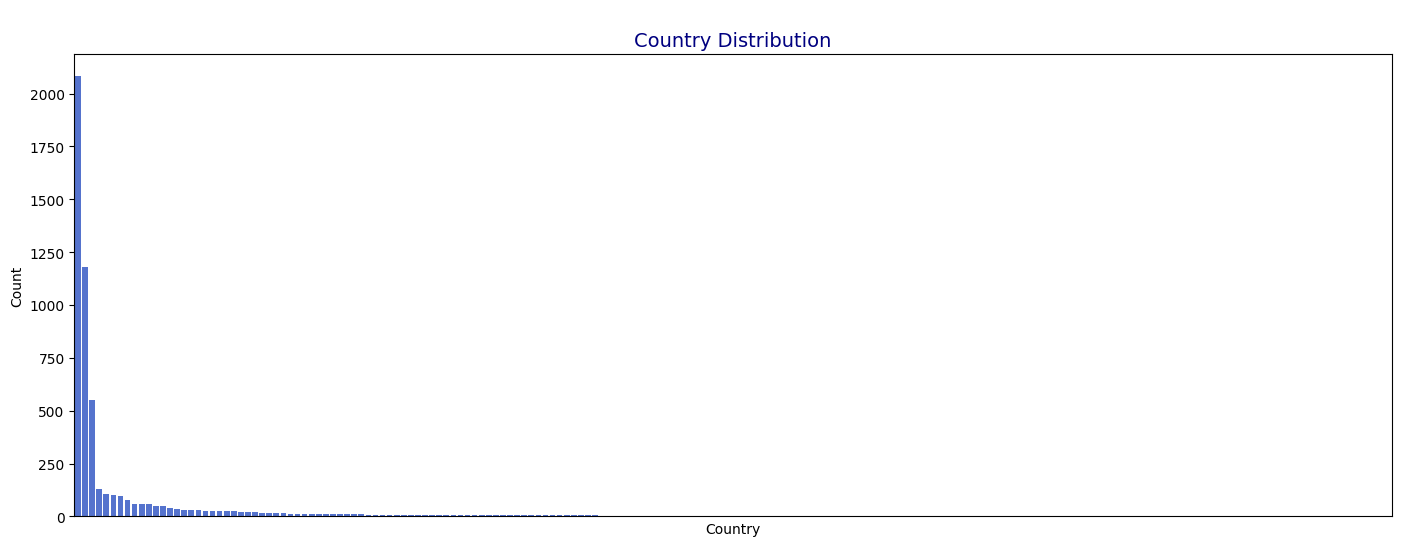

In [154]:
# Vamos a ver como se distribuye en funcion del pais, area y location. Vemos que hay demasiados paises como para sacar conclusiones, de manera, que tendremos que quedarnos con una muestra mas representativa
df = sharks_clean_dates["Country"].value_counts()
plt.figure(figsize=(17, 6))
sns.countplot(x='Country', data=sharks_clean_dates, order=df.index, color='royalblue')
plt.title('\nCountry Distribution', color='navy', size = 14)
plt.xlabel('Country')
plt.xticks([])
plt.ylabel('Count')
plt.show()


In [155]:
# Dado que 138 filas no suponen una muestra grande sobre las 6k que tenemos, obviaremos estas de cara a poder sacar conclusiones.
sharks_clean_dates[(sharks_clean_dates["Location"] == "unknown") & (sharks_clean_dates["Area"] == "unknown") & (sharks_clean_dates["Location"] == "unknown")]
sharks_all_country = sharks_clean_dates[(sharks_clean_dates["Location"] != "unknown") & (sharks_clean_dates["Area"] != "unknown") & (sharks_clean_dates["Location"] != "unknown")]

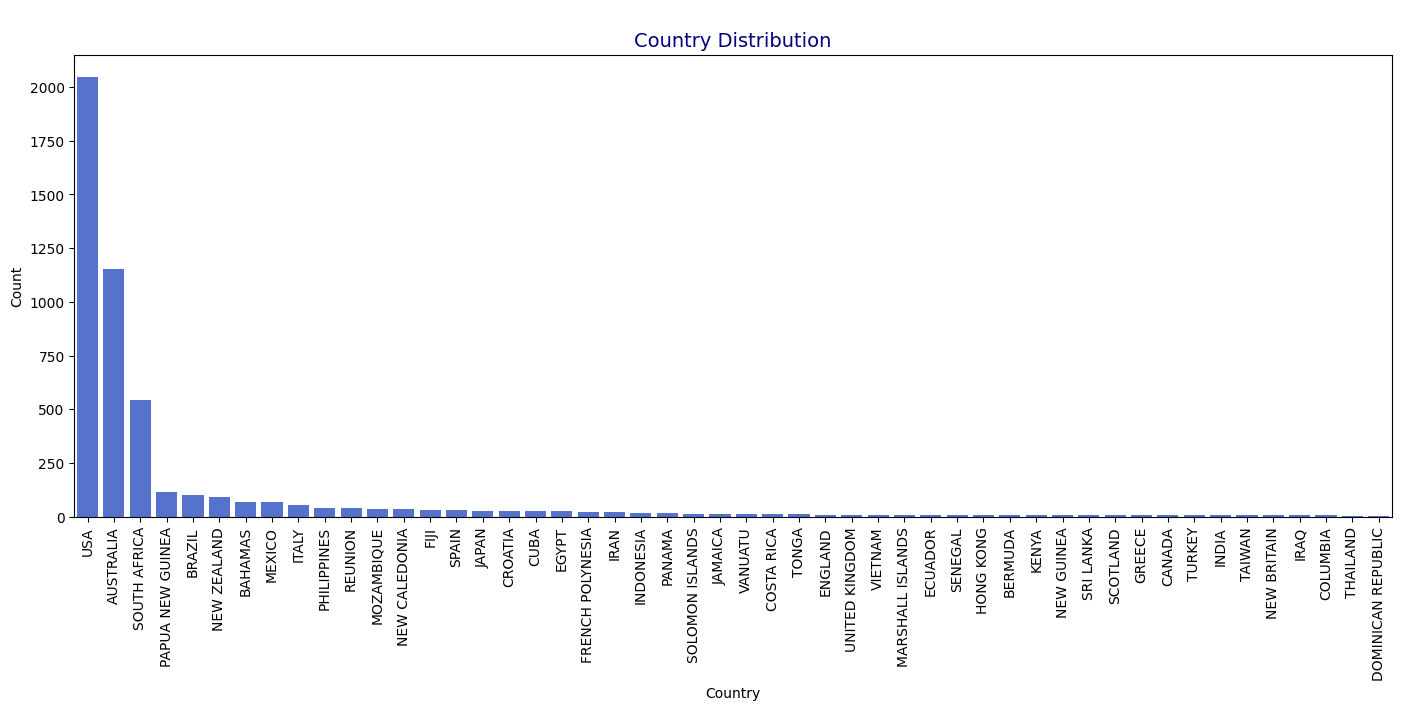

In [156]:
df = sharks_all_country["Country"].value_counts().head(50)
plt.figure(figsize=(17, 6))
sns.countplot(x='Country', data=sharks_all_country, order=df.index, color='royalblue')
plt.title('\nCountry Distribution', color='navy', size = 14)
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [157]:
# SACAR LOS CONCLUSIONES CON LAS ZONAS MAS REPRESENTATIVAS

In [158]:
# Intentamos deducir el sexo por el nombre y actualizamos
#pd.options.display.max_rows = 20
sharks_all_country[(sharks_all_country["Sex"] == "unknown") & (sharks_all_country["Name"] != "unknown") & (sharks_all_country["Name"] != "anonymous")]

new_sex = {218: "M",
            243: "M",
            326: "M",
            513: "M",
            805: "M",
            839: "M",
            911: "M",
            1164: "M",
            1177: "M",
            1186: "M",
            1405: "F",
            1522: "M",
            1525: "F",
            1655: "M",
            1995: "M",
            2221: "M",
            2225: "M",
            2246: "M",
            2424: "M",
            2452: "M",
            2472: "M",
            2478: "M",
            2502: "M",
            2571: "M",
            3059: "M",
            3162: "M",
            3235: "M",
            3680: "M",
            3768: "M",
            3772: "M",
            3819: "M",
            3824: "M",
            3847: "M",
            3855: "M",
            3926: "M",
            4034: "M",
            4035: "M",
            4036: "F",
            4061: "M",
            4079: "M",
            4082: "M",
            4083: "M",
            4087: "M",
            4092: "M",
            4127: "M",
            4135: "M",
            4173: "M",
            4188: "M",
            4242: "M",
            4274: "M",
            4289: "F",
            4306: "M",
            4307: "M",
            4403: "M",
            4404: "M",
            4467: "M",
            4576: "M",
            4587: "M",
            4590: "M",
            4601: "M",
            4832: "M",
            4738: "M",
            4741: "M",
            4784: "M",
            4803: "M",
            4839: "M",
            4856: "M",
            4875: "M",
            4877: "M",
            4906: "M",
            5008: "M",
            5019: "M",
            5082: "M",
            5187: "M",
            5198: "M",
            5125: "M",
            5203: "M",
            5221: "M",
            5254: "M",
            5549: "M",
            5502: "M",
            5560: "M",
            }

sharks_all_country["Sex"].update(pd.Series(new_sex))
# Eliminamos espacios en blanco y valores no desados
sharks_all_country["Sex"].replace({"M ": "M",
                                   "N": "M",
                                   "lli": "unknown"}, inplace= True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1561004026.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sharks_all_country["Sex"].update(pd.Series(new_sex))
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1561004026.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Sex"].update(pd.Series(new_sex))
C:\Users\lu

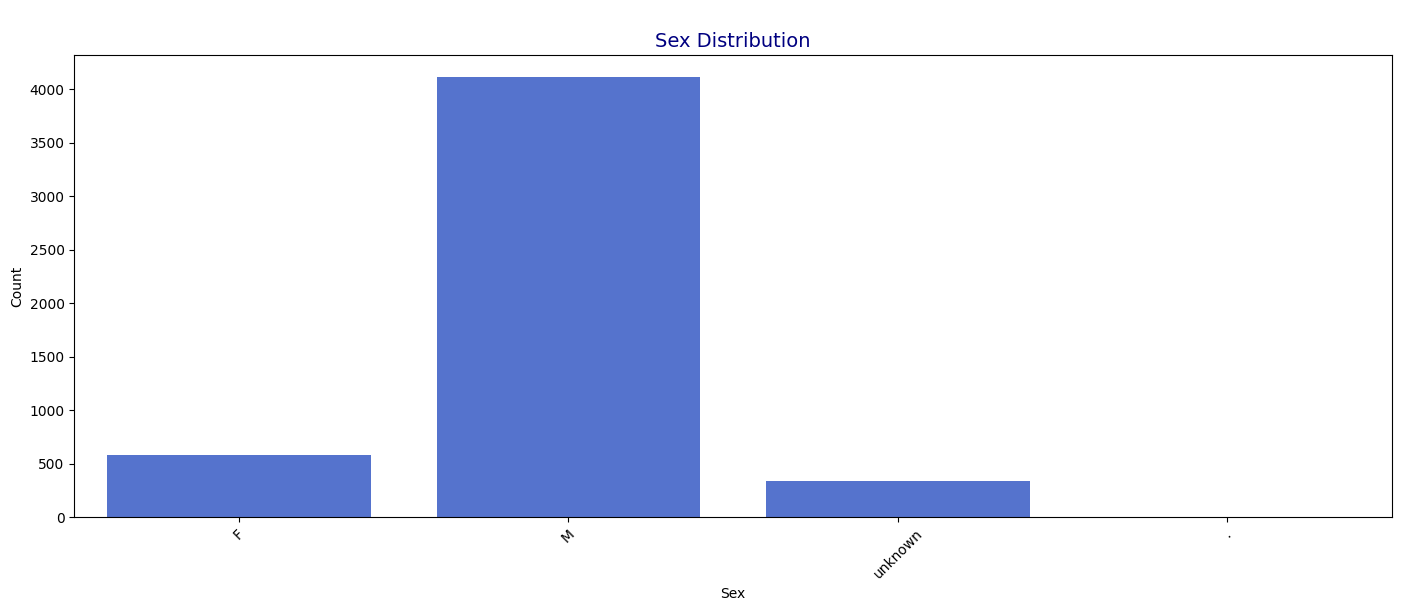

In [159]:
# Vamos a ver como se distribuye la variable sexo
# Observamos que aun queda algun unknown. 
# Pero con este grafico observamos que la mayoria de ataques por tiburones se da contra el genero masculino
plt.figure(figsize=(17, 6))
sns.countplot(x='Sex', data=sharks_all_country, color='royalblue')
plt.title('\nSex Distribution', color='navy', size = 14)
plt.xlabel('Sex')
plt.xticks(rotation =  45)
plt.ylabel('Count')
plt.show()

In [175]:
# Examinamos Age para corregir valores extraños. Utilizaremos el metodo replace para corregir los datos ya que hay objetos repetidos
# De cara a reemplazar los años, dado que, muchos se encuentran en rangos utilizaremos la mediana.
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"\D[a-zA-Z]"))] # Utilizamos una mascara y regex para encontrar los valores extraños
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"^\d\d\s\D"))]
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"^\d\s\s"))]
sharks_all_country[(sharks_all_country["Age"] != "unknown") & (sharks_all_country["Age"].str.contains(r"\A\D\s"))]
sharks_all_country["Age"].replace({"Teen": "16", # Persona entre 13 y 19 de manera que cogemos la mediana que es 16.
                                   "teen": "16",
                                   "18 months": "1",
                                "18 or 20": "19",
                                "12 or 13": "12",
                                "Teens": "16",
                                "8 or 10": "9",
                                "30 or 36": "33", # Mediana
                                "33 or 37": "35",
                                "mid-30s": "35", # Mediana de la decada. Entre 30 y 40 - 35
                                "60s": "65", # Mediana de la decada. Entre 60 y 70 - 65
                                "16 to 18": "17",
                                "mid-20s": "25",
                                "Ca. 33":"33", # Suponemos que se trata de un error al entrar la edad 
                                "21 or 26": "24",
                                "18 to 22": "20",
                                "adult":"42", # En este caso la edad adulta va de los 25 a los 60, asi que suponemos la media
                                "(adult)":"42",
                                "25 or 28": "26",
                                '"middle-age"':"50", # Middle age va entro los 40 y los 60 asi que cogemos la mediana 
                                "13 or 18": "16",
                                "2 or 3 months": "1", # Supondremos que esta mas cerca de los 0 años pero como no tiene sentido que tenga 0 años ponemos 1
                                "MAKE LINE GREEN": "unknown",
                                'young': "20", # La edad joven va entre los 15 y los 24, cogemos la mediana
                                "7 or 8": "7",
                                "8 or 10": "9",
                                "Both 11": "11",
                                "9 or 10": "9",
                                "A.M.": "unknown",
                                "10 or 12": "11",
                                "31 or 33": "32",
                                "2 to 3 months" : "1",
                                "28 & 26": "27", # Cogemos la mediana
                                "36 & 26": "31", # Cogemos la mediana
                                "21 & ?": "unknown",
                                "23 & 20": "22",
                                "23 & 26": "24",
                                "33 & 37": "35",
                                "30 & 32": "31",
                                "50 & 30": "40",
                                "17 & 35": "26",
                                "34 & 19": "27",
                                "33 & 26": "30",
                                "17 & 16": "17",
                                "36 & 23": "30",
                                "7   &   28": "18",
                                "9 & 12": "11",
                                "? & 19": "unknown",
                                "?   &   14": "unknown",
                                "30s": "35",
                                "50s": "55",
                                "6½": "6", # Redondeamos hacia a bajo
                                "40s": "45",
                                "20s": "25", 
                                "21, 34,24 & 35": "29", # Hacemos la media y redondeamos hacia arriba
                                "74 ": "74", # Sacamos espacios en blanco
                                "45 ": "45",
                                "20 ": "20",
                                ">50": "unknown", # Dado que es un rango muy elevado mejor pasar esta muestra a unknown
                                "\xa0 ": "unknown",
                                "X": "unknown",
                                "F": "unknown",
                                " ": "unknown",
                                " 30": "30",
                                " 28": "28",
                                " 43": "43",
                                "  ": "unknown",
                                "60's": "65",
                                '"young"': "20",
                                }, inplace= True)
# Para esta fila realizamos el cambio de esta manera por problemas en el replace ,
new_age = ({3986:"26", # 37, 67, 35, 27, ? & 27 hacemos la media contando que son 6 personas
            2422: "19", # 7 & 31 cogemos la mediana que es 19
            5181: "unknown",}) # ? & 14 unknown
sharks_all_country["Age"].update(pd.Series(new_age))


C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3026283638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Age"].replace({"Teen": "16", # Persona entre 13 y 19 de manera que cogemos la mediana que es 16.
C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\3026283638.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Age"].update(pd.Series(new_age))


In [176]:
# Nos quedamos los datos de Age conocidos para intentar analizar los datos
sharks_all_ages = sharks_all_country[sharks_all_country["Age"] != "unknown"]

<Axes: >

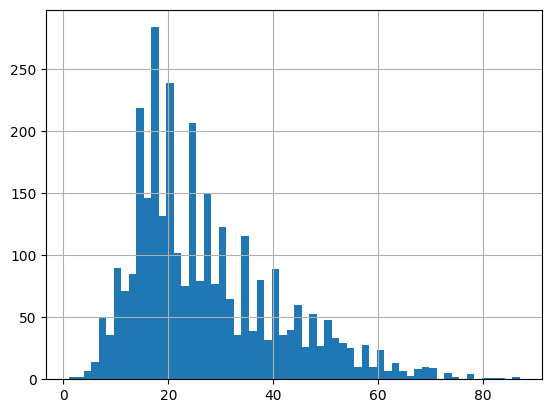

In [177]:
# Ahora que hemos arreglado Age podemos ver como se distribuye, vemos que la mayoria de los datos se distribuyen entre los 18 y los 38
# Convertimos la data a integer
sharks_all_ages["Age"].astype(int).hist(bins=60)


In [53]:
# Corregimos valores de Fatal mediante el replace
sharks_all_country[(sharks_all_country["Fatal (Y/N)"] != "unknown") & sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\s") | sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\d") | sharks_all_country["Fatal (Y/N)"].str.contains(r"\A\w[A-Z]") ]
sharks_all_country["Fatal (Y/N)"].replace({" N": "N",
                                           "N ": "N",
                                           "y": "Y",
                                           "M": "N", # Suponemos que es un error tipografico
                                           "2017" : "unknown",
                                           "UNKNOWN": "unknown",
                                           }, inplace= True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\1761277063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Fatal (Y/N)"].replace({" N": "N",


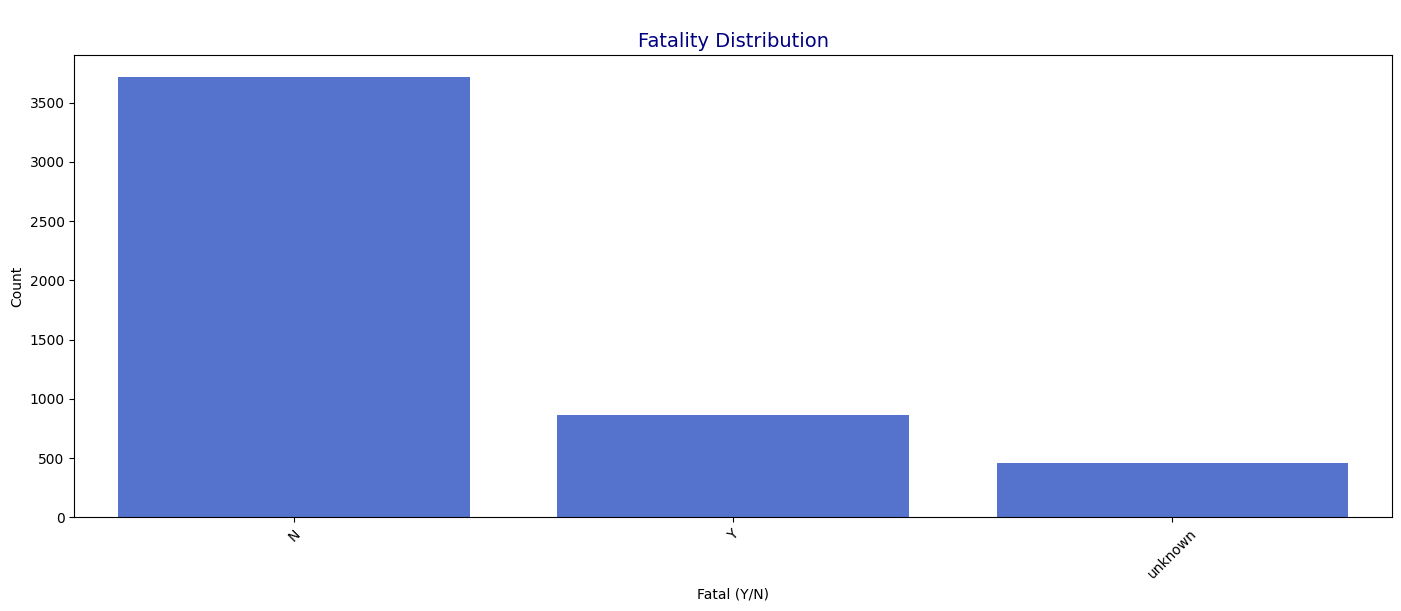

In [54]:
# Visualizamos la variable Fatal y podemos observar que la gran mayoria de los ataques no han sido mortales con diferencia, aun y teniendo una muestra poco significativa de unknowns
plt.figure(figsize=(17, 6))
sns.countplot(x='Fatal (Y/N)', data=sharks_all_country, color='royalblue')
plt.title('\nFatality Distribution', color='navy', size = 14)
plt.xlabel('Fatal (Y/N)')
plt.xticks(rotation =  45)
plt.ylabel('Count')
plt.show()

In [191]:
sharks_all_country[(sharks_all_country["Species"] != "unknown") & (sharks_all_country["Species"].str.contains("bull shark"))]

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
26,26,2018.04.15,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,Werner Danielsen,M,54,Lacerations to foot and ankle,N,unknown,Juvenile bull shark,"Straits Times, 4/16/2018",6277.0
590,590,2013.12.25,Unprovoked,NEW CALEDONIA,North Province,"Lindéralique, Hienghène",Snorkeling,Loïc Merlet,M,37,Leg bitten,N,11h00,Reported to involve a bull shark,"Les Novelles Caledonie, 12/26/2014",5713.0
607,607,2013.10.26,Unprovoked,REUNION,dÉtang-Salé,Ravine Mula,Body boarding,Gicquel Tanguy,M,24,Right leg severed,N,16h30,Thought to involve a bull shark,"Global Post, 10/26/2013",5696.0
616,616,2013.10.05,Unprovoked,USA,Florida,"Destin, Okaloosa County",Wading,Zachary Tyke Standridge,M,12,Lacerations to right forearm,N,15h30,Small bull shark,"Monroe County Advocate, 10/9/2013",5687.0
739,739,2012.09.10,Unprovoked,TONGA,Vava'u,Eueiki Island,Swimming,Kylie Maguire,F,29,Injuries to thighs & buttocks,N,unknown,Possibly a 3 m bull shark,"Northern Star, 9/13/2012",5564.0
772,772,2012.06.26,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Swimming,Nickolaus Bieber,M,6,Thigh bitten,N,19h00,possibly a bull shark,"WPTV.com, 6/26/2012",5531.0
806,806,2012.03.20,Unprovoked,AUSTRALIA,Queensland,Nobby's Beach,Surfing,Billy O'Leary,M,20,Lacerations to left calf,N,17h00,Possibly a bull shark,"Courier Mail, 3/20/2012",5497.0
807,807,2012.03.15,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Surfing,Frank Wacha,M,61,Left forearm bitten,N,15h50,Possibly a 5' to 6' bull shark,"WPBF.com, 3/16/2012",5496.0
825,825,2012.01.15,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Swimming,Lungisani Msungubana,M,25,FATAL,Y,15h40,Thought to involve a bull shark,"News 24, 1/15/2012; R. Bonorchis, Bloomberg Ne...",5478.0
1220,1220,2008.08.16,Unprovoked,USA,US Virgin Islands,Buck Island,Treading water,Elizabeth Riggs,F,38,Severe lacerations to left foot,N,Dusk,8' bull shark or Caribbean reef shark,"M. Levne, GSAF",5083.0


In [187]:
sharks_all_country["Species"].replace({"Questionable":"unknown",
                                       "A small shark": "check",
                                       "a very large shark": "check",
                                       "A pack of 6 sharks" : "check",
                                       " ": "unknown",
                                       "a blue shark": "Blue shark",
                                       }, inplace= True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_68620\2268609982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_all_country["Species"].replace({"Questionable":"unknown",


In [25]:

# Para continuar - hace falta eliminar alguna otra columna que no me interese para mis hipotesisi? (investigador). 
# Guardar los datos en un data frame limpio
# Empezar a sacar conclusiones
# variables categoricas - countplot
# variables numericas - distribuciones (histogram, boxplot)- como hago una visualizacion de country?
# groupby ()
# DUDAS - COMO ORDENO EN EL GRAFICO AGE?